Task 2: A \ B Testing Project

Domain: Data Science


In [1]:
# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
df = pd.read_csv("Testing.csv")

Exploratory Data Analysis & CLeaning Process

In [4]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [5]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
df.tail()

,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [8]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [9]:
df.shape

(90189, 5)

In [10]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [11]:
df.columns

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

<Axes: xlabel='version', ylabel='count'>

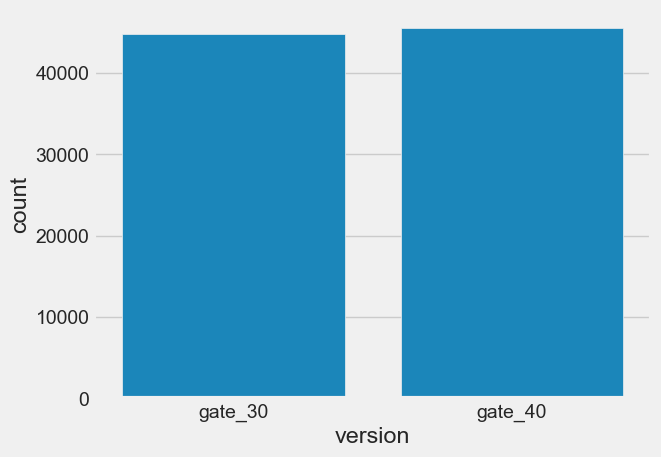

In [12]:
df.groupby("version")["userid"].count()
sns.countplot(x="version",data=df)

In [13]:
df.groupby('version').agg({"sum_gamerounds": ["count", "mean"]}).reset_index()

version sum_gamerounds           
                    count       mean
0  gate_30          44700  52.456264
1  gate_40          45489  51.298776

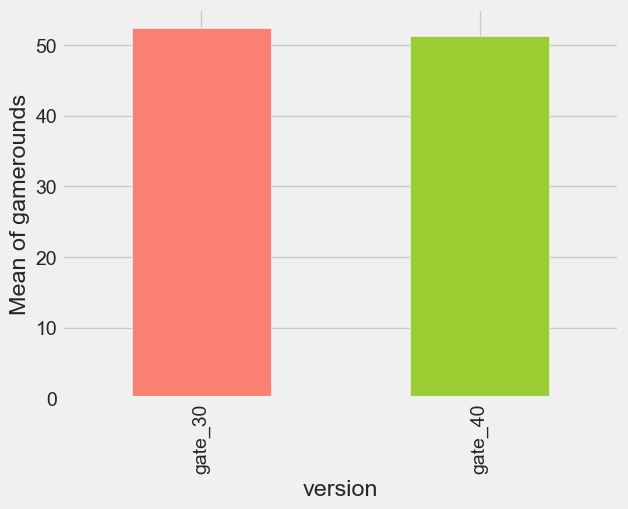

In [14]:
df.groupby("version")["sum_gamerounds"].mean()
df.groupby("version")["sum_gamerounds"].mean().plot(kind="bar", color=[ "salmon", "yellowgreen"]);

plt.ylabel("Mean of gamerounds");

In [15]:
df.sum_gamerounds.describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

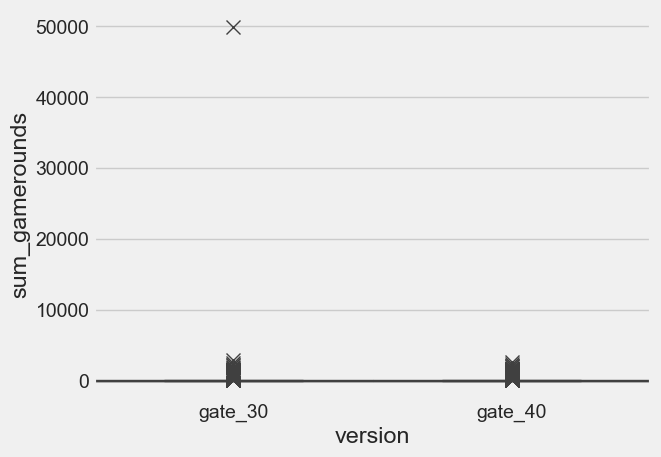

In [16]:
sns.boxplot(data=df, x="version", y="sum_gamerounds", flierprops={"marker": "x"}, width=1.0, fliersize=10);

In [17]:
# I write a function to get rid of the outlier values.
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [18]:
replace_with_thresholds(df, "sum_gamerounds")

C:\Users\muham\AppData\Local\Temp\ipykernel_5536\4172689847.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1232.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [19]:
df.sum_gamerounds.describe()

count    90189.000000
mean        51.109221
std         99.312282
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       1232.500000
Name: sum_gamerounds, dtype: float64

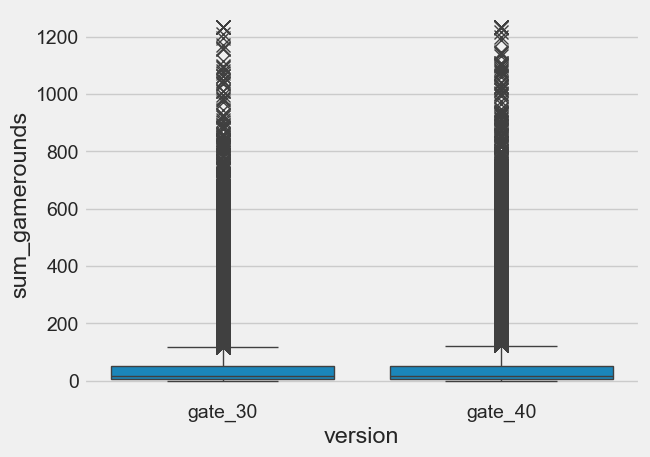

In [20]:
sns.boxplot(data=df, x="version", y="sum_gamerounds", flierprops={"marker": "x"}, width=0.8, fliersize=10);

In [21]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu


In [22]:
def AB_Test(df, pthres=0.05):
    
    # H0:  There is no statistical difference between the gate_30 and the gate_40.
    
    print(df.groupby('version').agg({"sum_gamerounds": ["count", "mean"]}))

    print("NORMAL DISTRIBUTION ASSUMPTION" .center(70,"*"))
    
    # H0 : The compared groups have a normal distribution
    
    pvalue_gate_30 = shapiro([df["version"] == "gate_30"])[1]
    pvalue_gate_40 = shapiro([df["version"] == "gate_40"])[1]
    
    print('p-value_gate30 = %.5f' % (pvalue_gate_30))
    print('p-value_gate40 = %.5f' % (pvalue_gate_40))

    if (pvalue_gate_30 < pthres) & (pvalue_gate_40 < pthres):
        print("Normality H0 is rejected.\n\n")
    else:
        print("Normality H0 is not rejected.\n")

    print("VARIANCE HOMOGENEOUS ASSUMPTION ".center(70,"*"))
    
    # H0 : The variance of compared groups is homegenous.
    
    p_value_levene = levene(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                            df.loc[df["version"] == "gate_40", "sum_gamerounds"])[1]
    
    print('p_value_levene = %.5f' % p_value_levene)

    if p_value_levene < pthres:
        print("Variance Homogeneity H0 is rejected.\n")
    else:
        print("Variance Homogeneity H0 is not rejected.\n")

    if ((pvalue_gate_30 > pthres) & (pvalue_gate_40 > pthres)) & (p_value_levene > pthres):
        p_value_ttest = ttest_ind(df.loc[df["version"] == "gate_30"],
                                  df.loc[df["version"] == "gate_40"],
                                  equal_var=True)[1]
        
        print('p_value_ttest = %.5f' % p_value_ttest)

    elif ((pvalue_gate_30 > pthres) & (pvalue_gate_40 > pthres)) & (p_value_levene < pthres):
        p_value_ttest = ttest_ind(df.loc[df["version"] == "gate_30"],
                                  df.loc[df["version"] == "gate_40"],
                                  equal_var=False)[1]
        
        print('p_value_ttest = %.5f' % p_value_ttest)
    else:
        print("Non-Parametric test should be done.\n\n")
        pvalue = mannwhitneyu(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                              df.loc[df["version"] == "gate_40", "sum_gamerounds"])[1]
        
        print('p_value = %.5f' % pvalue)

    print(" RESULT ".center(70,"*"))

    if pvalue < pthres:
        print(
            f"p-value {round(pvalue, 5)} < 0.05  H0 Hypothesis is Rejected. That is, there is a statistically significant difference between them.")

    else:
        print(
            f"p-value > {pthres} H0 is Not Rejected, That is, there is no statistically significant difference between them. The difference was made by chance.")
AB_Test(df,0.05)

        sum_gamerounds           
                 count       mean
version                          
gate_30          44700  51.153423
gate_40          45489  51.065785
********************NORMAL DISTRIBUTION ASSUMPTION********************
p-value_gate30 = 0.00000
p-value_gate40 = 0.00000
Normality H0 is rejected.


*******************VARIANCE HOMOGENEOUS ASSUMPTION *******************
p_value_levene = 0.83018
Variance Homogeneity H0 is not rejected.

Non-Parametric test should be done.


p_value = 0.05021
******************************* RESULT *******************************
p-value > 0.05 H0 is Not Rejected, That is, there is no statistically significant difference between them. The difference was made by chance.


c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 90189.
  res = hypotest_fun_out(*samples, **kwds)
